# 클러스터 분석

* Last updated 20201031SAT1030

* C.2 문제의 이해
* C.3 클러스터링 종류
    * 분할 클러스터링
    * 계층 클러스터링
    * 밀집도 기반 클러스터링
* C.4 k-Means
    * C.4.1 알고리듬
    * C.4.2 구현
        * 데이터
        * 단계 1: 설정
        * 단계 2: 할당
        * 단계 3: 갱신
        * 단계 4: 종료
* C.5 함수로 만들기
* C.6 skleran
* 문제: sklearn 클러스터링
* C.7 Spark
* 문제: Iris 클러스터링



## C.2 문제의 이해

클러스터링은 **Unsupervised learning** 기법이다. 
의사결정트리, kNN 등과 같이 답을 미리 정해놓고 사례를 훈련해서 모델링을 할 필요가 없다.
클러스터링은 훈련없이, 데이터를 그룹화거나 클러스터로 군집화하게 된다.
데이터를 특징에 따라 보다 가까운 클러스터로 할당해 묶게 된다.

이런 기법이 유용하게 사용되는 분야는 다양하다.
예를 들어, 소비자를 서로 다른 특징을 가진 세그먼트로 분류해 보다 유용한 마케팅 기법을 적용할 수 있게 한다.
또는 병원에서 환자를 특징으로 분류해, 암, 파킨슨이나 정신병의 환자를 진단하거나 처치에 활용하기도 한다.

## C.3 클러스터링 종류

### C.3.1 분할 클러스터링

분할 클러스터링 Partitioning clustering에서는 클러스터의 개수 **k를 미리 정하고**, 데이터를 k의 그룹으로 구분한다.
k 그룹은 완전하게 분리되어, 어떤 데이터이든 여러 그룹에 속해 있을 수 없다.
클러스터는 데이터의 평균으로 계산된 중심점을 가지게 된다.
따라서 평균에서 멀리 떨어진 이상 값, outlier에 영향을 받는다는 단점이 있다.
k-Means가 대표적인 분할 클러스터링 기법이다.

### C.3.2 계층 클러스터링

계층 클러스터링 hierarchical clustering
미리 클러스터의 개수를 지정할 필요가 없다.
**Dendrogram**이라고 하는 나무 가지모양으로 데이터를 구분한다.

### C.3.2 밀집도 기반 클러스터링

밀집도 기반 클러스터링 Density-based clustering은 특정 지역에서의 집적 정도에 따라 클러스터를 구분하는 기법이다. 클러스터의 개수를 미리 지정할 필요 없다. 다만 지역으로 분포된 가운데 데이터가 많이 집적된 곳을 그렇지 않은 곳을 hot spot으로 구분하여 클러스터로 인식하는 것이다.
**DBSCAN**을 예로 들 수 있다.

## C.4 k-Means

### C.4.1 알고리즘

* 군집의 갯수 k를 정하고, 중심점 $C_k$을 정한다. 이 중심점은 반복하면서 갱신하게 된다.
* 반복:
    * 할당 단계: 각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당
        * 모든 데이터  ${x_1,x_2,\cdots,x_n}\in D$에 대해 반복
            * 각 데이터 $x_n$에서 각 클러스터 $C_k$ 거리를 계산 $dist(x_n,m_k)=\|x_n-m_k\|$ ($m_k$는 $C_k$ 평균을 말한다)
            * $x_n$을 가장 가까운 클러스터 $C_k$에 할당
    * 갱신 단계:
        * 현재 클러스터에 할당된 데이터로의 평균을 계산하여 새로운 클러스터 $C_k$의 중심점$m_k$를 설정
    * 종료 단계:
        * 갱신이 더 이상 없으면 종료

### C.4.2 구현

#### 데이터

다음과 같은 데이터가 있다고 하자.

구분 | 1 | 2 |...|...|...|...|...|...|n 
--|---|---|---|---|---|---|---|---|---
x | 2 | 3 | 2 | 5 | 7 | 8 | 9 | 8 | 7
y | 5 | 6 | 4 | 7 | 2 | 3 | 4 | 4 | 3

numpy 배열로 데이터를 구성하자.

In [1]:
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

#### 단계 1: 설정

클러스터는 군집의 가운데 있는 점으로, 몇 개로 할 것인지 결정해야 한다.
클러스터의 적당한 개수는 통계적으로 결정할 수도 있다.
또한 그 중심점을 어떻게 선정할 것인지 결정해야 하는데, 무작위로 하거나 또는 임의로 데이터를 선정할 수 있다.

2개로 설정해 놓자.

In [2]:
k = 2

k=2에 따라, centeroid를 임의로 선택한다.

In [3]:
centroids = np.array([[2,5],[7,2]], dtype = float)

### 단계 2: 할당

각 데이터 항목을 중심점과 얼마나 멀리 있는지 계산하여, 클러스터에 할당한다.

#### 거리 계산

```norm()``` 함수의 default는 L2라서 생략할 수 있고, Eculdean distance과 동일하다.

In [4]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

#### 거리를 계산하여 가까운 중심점에 할당

x는 $2 \times 9$ 행렬이다. 첫째 데이터에 대해서 거리를 계산해서, 가까운 중심점에 할당해보자.

x[0]으로부터 중심점까지의 거리를 구해보자.

In [5]:
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]


그러면 어느 쪽으로 할당되어야 할까?
당연히 거리가 짧은 중심점에 배정이 되어야 한다.
swap 알고리즘으로 최소 길이를 고르자.
swap에 필요한 np.inf는 양수의 무한 값으로 임의의 최대 값을 가진다.

In [6]:
minDist = np.inf
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))
    # pick the closest centroid
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print (".....Assigning {} to {}th centroid by {:.3f}".format(x[0], minIndex, minDist))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]
.....Assigning [2. 5.] to 0th centroid by 0.000


#### 모든 데이터에 대해 거리를 계산하고 가까운 중심점에 할당.

clustering 처리결과를 저장하기 위한 저장소를 설정한다.
clusterAssigned에는 index, 거리를 저장한다.

In [7]:
clusterAssigned = np.zeros(shape = (x.shape[0],2), dtype = float)
print (clusterAssigned)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


각 데이터의 거리를 계산하면, 아래 표와 같이 4개는 C1, 아래 5개는 C2에 할당된다.

x | y | C1 [2,5] | C2 [7,2]
-----|-----|-----|-----
2 | 5 | 0.000 | 
3 | 6 | 1.414 | 
2 | 4 | 1.000 | 
5 | 7 | 3.606 | 
7 | 2 |  | 0.000
8 | 3 |  | 1.414
9 | 4 |  | 2.828
8 | 4 |  | 2.236
7 | 3 |  | 1.000


In [8]:
x.shape

(9, 2)

In [9]:
row, c = x.shape
for i in range(row):
    minDist = np.inf   # arbitray max
    minIndex = -1      # arbitray index
    for j in range(k):
        # distance from centroids[j] to x[i]
        distJI = normDist(centroids[j], x[i])
        # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
        # pick the closest centroid
        if distJI < minDist:
            minDist = distJI
            minIndex = j
    print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]   #-----changed

.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000


각 클러스터에 할당된 인덱스와 거리를 출력해보자.

In [10]:
print (".....Assigned clusters: \n{}".format(clusterAssigned))

.....Assigned clusters: 
[[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]


### 단계 3: 갱신

현재 클러스터에 할당된 데이터로의 평균 $m_k$을 계산하여 새로운 클러스터 $C_k$의 중심점을 설정한다.
새로운 중심점을 구하기 위해서는, 각 중심점에 할당된 데이터들을 모아서 평균을 계산해야 구할 수 있다.
앞서 clusterAssigned에는 할당된 인덱스와 거리를 저장해 놓았다.

In [11]:
clusterAssigned[:,0]

array([0., 0., 0., 0., 1., 1., 1., 1., 1.])

첫 번째 중심점에 할당된 데이터를 출력해 보자.

In [12]:
x[clusterAssigned[:,0]==0]

array([[2., 5.],
       [3., 6.],
       [2., 4.],
       [5., 7.]])

두 번째 중심점에 할당된 데이터를 출력해 보자.

In [13]:
x[clusterAssigned[:,0]==1]

array([[7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])

각 중심점에 할당된 평균으로 새로운 중심점을 계산한다.

In [14]:
_centroids=np.zeros(shape=(k,x.shape[1]), dtype=float)

In [15]:
for cent in range(k):
    _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)

In [16]:
print ("Centroids updated: \n", _centroids)

Centroids updated: 
 [[3.  5.5]
 [7.8 3.2]]


### 단계 4: 종료

반복을 종료할 것인지 확인한다.
소수점을 비교할 경우, 자리수의 정밀도에 따라 동일한 값인지 확인하기 어려울 수 있다.
np.equal() 함수를 사용해서 중심점이 갱신되었는지 확인하게 된다.

In [17]:
comparison = np.equal(centroids, _centroids)
print(comparison.all())

False


또는 np.isclose()는 tolerence를 어느 정도 허용하면서 동일한지 비교하므로 사용할 수 있다. 

In [18]:
comparison = np.isclose(centroids, _centroids)
print(comparison.all())

False


그래프를 그리면 클러스터링을 직관적으로 보다 쉽게 이해할 수 있다.

파란점으로 데이터 좌표를, 중심점은 빨간 색으로 그려보자.

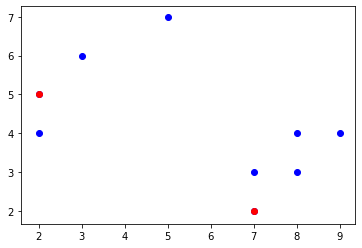

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(centroids[:,0],centroids[:,1],color='red')

## C.5 함수로 만들기

### 거리 계산 함수

두 점 사이의 거리를 계산하는 함수이다.

In [22]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

### 클라스터링 함수

알고리즘을 정리하면 다음과 같다.
* ??1회 반복 후에 여기에 centroids를 _centroids로 갱신해주는 코드가 있어야

```python
while 무한반복 시작
    for 행 갯수만큼 반복
        최소길이 초기화
        최소인덱스 초기화
        for 중심점 개수만큼 반복
            중심값과 각 데이터 거리 계산
            if 최소 거리값이면, 그 클러스터에 할당
                최소값 갱신
                최소인덱스 갱신
        if 클러스터가 변경되지 않았으면:
            무한반복 종료
        else:
            old 중심점을 new 중심점으로 갱신
            무한반복 계속
```

In [23]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

### 그래프

데이터의 파란 색으로 산포하고 빨간색으로 중심점을 찍는 그래프를 작성하는 함수이다.

In [24]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

아래 데이터로 실행해보자.
데이터의 초기 중심점으로 결과가 다르게 나올 수 있다는 점에 유의하자.



====== Iteration 1 ======
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000

.....Assigned clusters: 
 [[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]

.....Updating Centroids
 [[2. 5.]
 [7. 2.]] => 
[[3.  5.5]
 [7.8 3.2]]


====== Iteration 2 ======
.....Assigning [2. 5.] to 0th centroid by 1.118
.....Assigning [3. 6.] to 0th centroid by 0.500
.....Assigning [2. 4.] to 0th centroid by 1.803
.....Assigning [5. 7.] to 0th centroid by 2

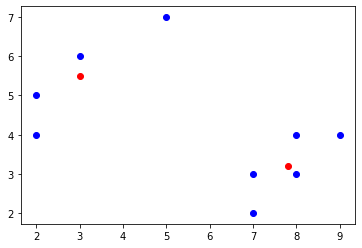

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(x, k, centroids)
draw(x, centroids)

## 문제: k-Means 클러스터링

```sklearn.datasets.make_blobs```를 사용하여 데이터를 생성한다.
```
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
```

이 데이터를 4개의 클러스터로 군집화하세요.
Python으로 구현해서 클러스터링하는데, 앞서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.
(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

Parameters
* n_samples: 샘플 갯수 (기본 값은 100)
* n_features: features 갯수 (기본 값은 2)
* centers: 중심점 갯수
* cluster_std: 클러스터 표준편차 (기본 값은 1.0)
* random_state: 기본 값은 None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

반환:
* X 배열 [n_samples, n_features]
* y: 배정된 클러스터 The generated samples.

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

함수를 약간 수정해야 한다.
cluster함수의 3번째 줄을 아래와 같이 수정해야 한다.

```python
clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
```

In [55]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])



====== Iteration 1 ======
.....Assigning [0.669787   3.59540802] to 2th centroid by 1.390
.....Assigning [-2.02396992  7.99569054] to 1th centroid by 0.976
.....Assigning [1.43289271 4.37679234] to 2th centroid by 0.681
.....Assigning [1.06923853 4.53068484] to 2th centroid by 1.071
.....Assigning [1.71444449 5.02521524] to 2th centroid by 1.064
.....Assigning [0.74387399 4.12240568] to 2th centroid by 1.262
.....Assigning [-2.04363942  4.06392123] to 0th centroid by 1.431
.....Assigning [-0.67860329  7.88799076] to 1th centroid by 2.324
.....Assigning [-0.04749204  5.47425256] to 2th centroid by 2.523
.....Assigning [-1.46976488  7.69183251] to 1th centroid by 1.561
.....Assigning [-0.86417686  6.86528639] to 1th centroid by 2.419
.....Assigning [-1.84838498  6.90859736] to 1th centroid by 1.587
.....Assigning [-1.27182547  7.13460392] to 1th centroid by 1.933
.....Assigning [-0.93428978  7.73253222] to 1th centroid by 2.083
.....Assigning [-0.73415741  7.44484466] to 1th centroid b

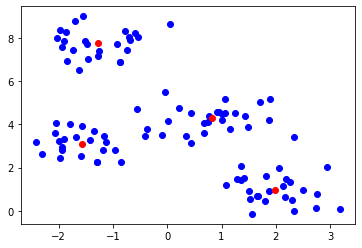

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

k = 4
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

## C.6 sklearn

### 데이터

In [21]:
import numpy as np

X = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

### k-means 클러스터링

* n_clusters=2, 클러스터를 2개로 설정,
* ```init='random'```은 초기화를 무작위로 설정,
* ```random_state=2```에 정수를 입력하면, 그 정수는 중심값을 무작위로 생성하는 seed로 쓰인다. seed를 정하게 되면, 클러스터링을 몇 번 해도 동일한 결과가 만들어질 수 있다.

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', random_state=2).fit(X)

### 클러스터 할당

각 데이터 항목에게 배정된 클러스터를 출력하면, 앞서의 결과와 동일하다.

In [20]:
print ("Cluster label: ", kmeans.labels_)

Cluster label:  [0 0 0 0 1 1 1 1 1]


클러스터의 중심점을 출력해보자.

In [17]:
print ("Centroid: ", kmeans.cluster_centers_)

Centroid:  [[3.  5.5]
 [7.8 3.2]]


### 예측

두 점을 입력하고, 어느 클러스터에 할당되는지 예측해볼 수 있다.

In [18]:
print ("Predictions: ", kmeans.predict([[0, 0], [7, 4]]))

Predictions:  [0 1]


## 문제: sklearn 클러스터링

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print ("Cluster label: ", kmeans.labels_)
print ("Centroid: ", kmeans.cluster_centers_)
print ("Predictions: ",kmeans.predict([[0, 0], [4, 4]]))

Cluster label:  [1 0 1 0 0 1]
Centroid:  [[3.         3.33333333]
 [2.         0.66666667]]
Predictions:  [1 0]


## C.7 Spark

Python 실행경로를 지정해주고, SparkSession을 먼저 생성하자.

In [1]:
import sys
import os

home=os.path.expanduser("~")
os.environ["PYSPARK_PYTHON"]="C:\\Users\\zaqxs\\Anaconda2\\envs\\py35\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Users\\zaqxs\\Anaconda2\\envs\\py35\\python.exe"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.9-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 데이터 생성

numpy 배열 데이터를 생성해보자. 2개의 속성으로 구성된 배열을 2차원으로 가지고 있다.

In [3]:
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

### DataFrame

Numpy array와 Spark Dataframe은 서로 다른 구조를 가지고 있으며, 데이터타입도 서로 다르다.
numpy array는 Pandas를 통하거나, RDD로 만든 후, DataFrame으로 변환해준다.
여기서는 RDD를 통해서 DataFrame으로 만들기로 하자.

In [4]:
_xRdd = spark.sparkContext.parallelize(x)

Rdd는 컬럼명이나 데이터타입을 설정하지 않고 만들었다.
데이터를 정수형으로 변환해주자.

In [5]:
xRdd = _xRdd.map(lambda x: [int(i) for i in x])

데이터가 올바르게 읽혀졌는지 collect() 해보자.

In [6]:
xRdd.collect()

[[2, 5], [3, 6], [2, 4], [5, 7], [7, 2], [8, 3], [9, 4], [8, 4], [7, 3]]

이제 DataFrame으로 변환하자. 컬럼명은 같이 리스트 ```["x", "y"]```로 입력해준다.

In [7]:
xDf = xRdd.toDF(["x", "y"])
xDf.show()

+---+---+
|  x|  y|
+---+---+
|  2|  5|
|  3|  6|
|  2|  4|
|  5|  7|
|  7|  2|
|  8|  3|
|  9|  4|
|  8|  4|
|  7|  3|
+---+---+



### Features 설정

클러스터링에 쓰이게 될 속성을 ```VectorAssembler```로 묶어서 ```features``` 컬럼을 생성해주자.

In [8]:
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["x","y"],outputCol="features")

```VectorAssembler```를 적용한다.

In [9]:
xxDf = va.transform(xDf)

In [10]:
xxDf.printSchema()

root
 |-- x: long (nullable = true)
 |-- y: long (nullable = true)
 |-- features: vector (nullable = true)



In [11]:
xxDf.show(5)

+---+---+---------+
|  x|  y| features|
+---+---+---------+
|  2|  5|[2.0,5.0]|
|  3|  6|[3.0,6.0]|
|  2|  4|[2.0,4.0]|
|  5|  7|[5.0,7.0]|
|  7|  2|[7.0,2.0]|
+---+---+---------+
only showing top 5 rows



### k-means 클러스터링

mllib, ml 모두 KMeans 모델을 지원한다.
* k를 몇 개, 어떻게 정할지 설정한다.

클러스터의 수 k=1로 하고 k-means를 실행해보자.

In [12]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2)

In [13]:
model = kmeans.fit(xxDf)

### 클러스터 중심점

In [14]:
print (model.clusterCenters())

[array([7.8, 3.2]), array([3. , 5.5])]


## 문제: iris 데이터 클러스터링

iris는 꽃잎 및 꽃받침의 너비와 높이 데이터이다.
이 데이터를 군집화 해보자.

### 데이터

iris 데이터는 seaborn, sklearn 등 많은 패키지에서 내장해서 제공되고 있다.

In [15]:
from sklearn import datasets

dataset = datasets.load_iris()

sklearn에서 제공하는 데이터는 타입이 다르기 때문에, 바로 사용할 수 없고 변환을 해야 한다.
```sklearn.utils.Bunch```라고 하는 타입으로 저장되어 있는데, 이는 **Dictionary 타입**이라서 아래와 같은 키를 입력하여 읽을 수 있다.
* 'data': numpy.array로 저장된 속성 데이터
* 'target': numpy.array로 저장된 분류 데이터
* 'target_names': numpy.array로 저장된 분류 값 ['setosa', 'versicolor', 'virginica']
* 'DESCR': 데이터 관련한 설명
* 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

```dataset['data']```는 numpy array 타입이다. 데이터를 읽어보자.

In [16]:
data = dataset['data']

인덱스 ```1:5```, 즉 1부터 4까지, 4행을 읽어보자.

In [17]:
data[1:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 그래프

변수가 4개이므로, 4차원 그래프를 그려야 맞다.
그렇게 되면 명령어가 복잡해지므로, 3차원으로 그래프를 그려보자.
gca(projection='3d')라고 해주면 된다.

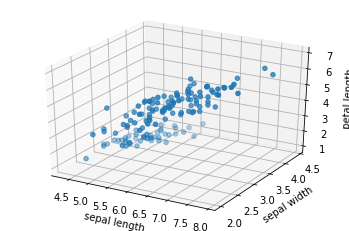

In [21]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

ax = plt.figure().gca(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()

### RDD 생성

numpy array는 바로 RDD를 생성할 수 있다.

In [22]:
_xRdd = spark.sparkContext.parallelize(data)

In [23]:
_xRdd.take(1)

[array([5.1, 3.5, 1.4, 0.2])]

### 형변환

앞서 보듯이 numpy.array에 생성되었으므로, array로 구성되어 있다. 이를 소수배열로 변환하자.

In [24]:
xRdd = _xRdd.map(lambda x: [float(i) for i in x])

In [25]:
xRdd.take(1)

[[5.1, 3.5, 1.4, 0.2]]

### k-Means 모델링

mllib 라이브러리의 KMeans 모델을 

```python
KMeanstrain(rdd, k, maxIterations=100, initializationMode='k-means', seed=None, initializationSteps=2, epsilon=0.0001, initialModel=None)
```

* rdd: RDD 훈련데이터
* k: 클러스터 갯수
* maxIterations: 최대 반복횟수 (기본 값: 100)
* initializationMode: 초기 알고리즘 "random" 또는 "k-means" (기본 값)
* seed: 클러스터 초기화에 필요한 무작위 seed 값 (default는 None (시스템시간에서 seed를 만드는 방식))
* initializationSteps: k-means 단계 수 (기본 값: 2)
* epsilon: 클러스터 중심값이 이 값이 이하로 움직이면 거리 임계값 (기본 값: 1e-4)
* initialModel: 초기 클러스터 중심값 (기본 값: None)

In [26]:
from pyspark.mllib.clustering import KMeans

model = KMeans.train(xRdd, k = 2, maxIterations = 10)

클러스터의 중심값을 출력해보자. k=2로 설정해 놓아서, 2개의 중심값이 출력된다.

In [27]:
model.clusterCenters

[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]),
 array([5.00566038, 3.36981132, 1.56037736, 0.29056604])]

이 경우의 오류를 계산해보자.

In [28]:
model.computeCost(xRdd)

152.34795176035803

from math import sqrt
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

### DataFrame 생성

이번에는 DataFrame으로 k-Means 클러스터링을 해보자.
앞서 상관관계를 계산하면서 사용했듯이, url으로부터 iris를 읽어보자.

In [29]:
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Spark DataFrame은 url에서 읽어서 생성할 수 없으므로, Pandas로 먼저 읽자.

In [30]:
import pandas as pd

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [31]:
irisDf = spark.createDataFrame(iris)

### 통계량

데이터는 모두 150개로 결측 값이 없다.
petal_length가 다른 측정값에 비해 표준편차가 다소 크다.
최대, 최소 값으로 추정하면, 그 측정 값이 다소 퍼져 있다는 것을 알 수 있다.
그러나 표준편차 2배 이상인 경우는 많지 않아 보인다.

In [32]:
irisDf.describe().show()

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



### features 생성

Vector assembler는 변수를 묶어서 하나의 Vector로 만들어 준다.

In [33]:
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"], outputCol="features")
xxDf = va.transform(irisDf)

features 컬럼이 vector로 만들어진 것을 확인해보자.

In [34]:
xxDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)
 |-- features: vector (nullable = true)



In [35]:
xxDf.show(3)

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
+------------+-----------+------------+-----------+-----------+-----------------+
only showing top 3 rows



입력데이터의 타입이 명목일수도 아닐 수도 있는 모르는 경우, Vector Indexer는 이 가운데 범주형 변수를 가려내어 Vector로 만든다. 참고로 String Indexer는 명목변수 컬럼을 인덱스 값으로 변환한다. 요일을 1~7 값으로 변환하는 경우를 예로 들 수 있다.

In [36]:
from pyspark.ml.feature import VectorIndexer

featureIndexer = VectorIndexer(inputCol="features", \
                               outputCol="featuresIndexed",\
                               maxCategories=4).fit(xxDf)
xxxDf = featureIndexer.transform(xxDf)

In [37]:
xxxDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- featuresIndexed: vector (nullable = true)



In [38]:
xxxDf.show(5)

+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|  featuresIndexed|
+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|[5.0,3.6,1.4,0.2]|
+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
only showing top 5 rows



### k-Means

features, featuresIndexed 어느 것으로 해도 결과는 동일하다.

kMeans 모델은 앞서 RDD에서와 같이 초기 값을 설정할 수 있다.
```python
(featuresCol='features', predictionCol='prediction', k=2, initMode='k-means', initSteps=2, tol=0.0001, maxIter=20, seed=None, distanceMeasure='euclidean', weightCol=None)
```
* maxIter: 클러스터를 분할하기 위한 최대 반복 횟수 (default: 20)


set함수를 이용해서 다음과 같이 할 수 있다.
```python
kmeans = KMeans()\
        .setK(k)\
        .setSeed(1) \
        .setFeaturesCol("indexedFeatures")\
        .setPredictionCol("cluster")
```

In [39]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2) \
            .setFeaturesCol("features") \
            .setPredictionCol("cluster")

In [40]:
model = kmeans.fit(xxDf)

In [41]:
print (model.clusterCenters())

[array([5.00566038, 3.36037736, 1.56226415, 0.28867925]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629])]


In [42]:
model.transform(xxDf).show()

+------------+-----------+------------+-----------+-----------+-----------------+-------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|cluster|
+------------+-----------+------------+-----------+-----------+-----------------+-------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|      0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|      0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|      0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|      0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|      0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|      0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|      0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|      0|
|         

### 최적의 클러스터 갯수

클러스터 분석에 있어, 최적의 갯수를 결정할 필요가 있는데, elbow, silhouette 그리고 gap statistic 방법이 있다.
elbow 방법은 클러스터의 개수를 결정하는 직관적 방법이다.
오류를 계산하고, 그래프를 그려서 클러스터 개수를 늘려도 그 오류의 기울기가 줄어드는 지점,
즉 추세가 꺽이는, 팔꿈치가 접히는 지점이 적당한 개수로 인식하게 된다.

Silhouette은 계수로 클러스터링 적합도를 측정한다. 계수는 -1 ~ 1 값을 가진다.
* 1: 클러스터가 서로 잘 분리되어 있다는 의미
* 0: 클러스터가 서로 차이가 없다는 의미. 클러스터 간의 거리가 유의미하지 않다
* -1: 클러스터에 할당된 데이터가 올바르지 못하다는 의미.

In [43]:
from pyspark.ml.evaluation import ClusteringEvaluator
#silhouette = np.zeros(15)
silhouetteList = list()
for i in range(2, 17):
    # Trains a k-means model.
    kmeans = KMeans().setK(i).setFeaturesCol("features")
    model = kmeans.fit(xxDf)
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    predictions = model.transform(xxxDf)
    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator().setMetricName("silhouette")
    silhouette = evaluator.evaluate(predictions)
    #silh_val.append(silhouette)
    print("...{} Within Set Sum of Squared Errors {}".format(i, silhouette))
    silhouetteList.append(silhouette)

...2 Within Set Sum of Squared Errors 0.8501515983265806
...3 Within Set Sum of Squared Errors 0.7354567373091194
...4 Within Set Sum of Squared Errors 0.6786090104505119
...5 Within Set Sum of Squared Errors 0.5630309705873886
...6 Within Set Sum of Squared Errors 0.5554393549629498
...7 Within Set Sum of Squared Errors 0.5220400727166026
...8 Within Set Sum of Squared Errors 0.4624706833684886
...9 Within Set Sum of Squared Errors 0.4683132871707216
...10 Within Set Sum of Squared Errors 0.4646742202819036
...11 Within Set Sum of Squared Errors 0.4627338803609877
...12 Within Set Sum of Squared Errors 0.4379126448597407
...13 Within Set Sum of Squared Errors 0.3866382642009429
...14 Within Set Sum of Squared Errors 0.4655930441786121
...15 Within Set Sum of Squared Errors 0.41054204834507635
...16 Within Set Sum of Squared Errors 0.39904053863783256


### 클러스터 갯수에 따른 오류의 그래프

그래프를 읽을 때, 클러스터의 갯수가 2개부터 시작한다는 점에 유의하자.
클러스터의 갯수가 2일 경우, 계수가 제일 높다.

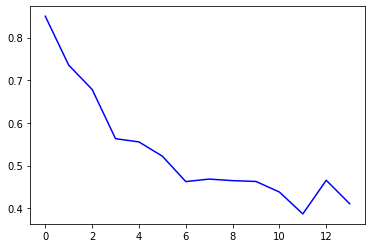

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(14), silhouetteList[0:14], color='blue')